In [187]:
import matplotlib as plt
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
import scipy.stats as st

In [188]:
cd/content/sample_data

/content/sample_data


In [189]:
pp=pd.read_csv("/content/StaritaDiarios96_2019prec.csv.csv",index_col=16,parse_dates=True)

In [190]:
Qdal=pd.read_csv("/content/CaudalAriporoMedDiario1996_2019.csv.csv",index_col=16,parse_dates=True)

In [191]:
pp.head()

,CodigoEstacion,NombreEstacion,Latitud,Longitud,Altitud,Categoria,Entidad,AreaOperativa,Departamento,Municipio,FechaInstalacion,FechaSuspension,IdParametro,Etiqueta,DescripcionSerie,Frecuencia,Valor,Grado,Calificador,NivelAprobacion
Fecha,,,,,,,,,,,,,,,,,,,,
1996-01-01,36010030,SANTA RITA [36010030],5.93425,-71.833917,350,Pluviográfica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 06 - Boyacá-Casanare-Vichada,Casanare,Hato Corozal,15/11/1995 00:00,NaN,PRECIPITACION,PTPM_CON,Día pluviométrico,Diaria,0.0,50,NaN,900
1996-01-02,36010030,SANTA RITA [36010030],5.93425,-71.833917,350,Pluviográfica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 06 - Boyacá-Casanare-Vichada,Casanare,Hato Corozal,15/11/1995 00:00,NaN,PRECIPITACION,PTPM_CON,Día pluviométrico,Diaria,0.0,50,NaN,900
1996-01-03,36010030,SANTA RITA [36010030],5.93425,-71.833917,350,Pluviográfica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 06 - Boyacá-Casanare-Vichada,Casanare,Hato Corozal,15/11/1995 00:00,NaN,PRECIPITACION,PTPM_CON,Día pluviométrico,Diaria,0.0,50,NaN,900
1996-01-04,36010030,SANTA RITA [36010030],5.93425,-71.833917,350,Pluviográfica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 06 - Boyacá-Casanare-Vichada,Casanare,Hato Corozal,15/11/1995 00:00,NaN,PRECIPITACION,PTPM_CON,Día pluviométrico,Diaria,0.0,50,NaN,900
1996-01-05,36010030,SANTA RITA [36010030],5.93425,-71.833917,350,Pluviográfica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 06 - Boyacá-Casanare-Vichada,Casanare,Hato Corozal,15/11/1995 00:00,NaN,PRECIPITACION,PTPM_CON,Día pluviométrico,Diaria,0.0,50,NaN,900


In [192]:
Qdal.head()

,CodigoEstacion,NombreEstacion,Latitud,Longitud,Altitud,Categoria,Entidad,AreaOperativa,Departamento,Municipio,FechaInstalacion,FechaSuspension,IdParametro,Etiqueta,DescripcionSerie,Frecuencia,Valor,Grado,Calificador,NivelAprobacion
Fecha,,,,,,,,,,,,,,,,,,,,
1996-05-01,36017010,PAZ DE ARIPORO [36017010],5.906556,-71.902389,274,Limnimétrica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 06 - Boyacá-Casanare-Vichada,Casanare,Hato Corozal,15/05/1993 00:00,NaN,CAUDAL,Q_MEDIA_D,Caudal medio diario,Diaria,27.6,4,EST. OTROS METODOS,900
1996-05-02,36017010,PAZ DE ARIPORO [36017010],5.906556,-71.902389,274,Limnimétrica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 06 - Boyacá-Casanare-Vichada,Casanare,Hato Corozal,15/05/1993 00:00,NaN,CAUDAL,Q_MEDIA_D,Caudal medio diario,Diaria,23.6,4,EST. OTROS METODOS,900
1996-05-03,36017010,PAZ DE ARIPORO [36017010],5.906556,-71.902389,274,Limnimétrica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 06 - Boyacá-Casanare-Vichada,Casanare,Hato Corozal,15/05/1993 00:00,NaN,CAUDAL,Q_MEDIA_D,Caudal medio diario,Diaria,56.2,4,EST. OTROS METODOS,900
1996-05-04,36017010,PAZ DE ARIPORO [36017010],5.906556,-71.902389,274,Limnimétrica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 06 - Boyacá-Casanare-Vichada,Casanare,Hato Corozal,15/05/1993 00:00,NaN,CAUDAL,Q_MEDIA_D,Caudal medio diario,Diaria,43.6,4,EST. OTROS METODOS,900
1996-05-05,36017010,PAZ DE ARIPORO [36017010],5.906556,-71.902389,274,Limnimétrica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 06 - Boyacá-Casanare-Vichada,Casanare,Hato Corozal,15/05/1993 00:00,NaN,CAUDAL,Q_MEDIA_D,Caudal medio diario,Diaria,39.9,4,EST. OTROS METODOS,900


In [193]:
pp.columns

Index(['CodigoEstacion', 'NombreEstacion', 'Latitud', 'Longitud', 'Altitud',
       'Categoria', 'Entidad', 'AreaOperativa', 'Departamento', 'Municipio',
       'FechaInstalacion', 'FechaSuspension', 'IdParametro', 'Etiqueta',
       'DescripcionSerie', 'Frecuencia', 'Valor', 'Grado', 'Calificador',
       'NivelAprobacion'],
      dtype='object')

In [194]:
Qdal.columns

Index(['CodigoEstacion', 'NombreEstacion', 'Latitud', 'Longitud', 'Altitud',
       'Categoria', 'Entidad', 'AreaOperativa', 'Departamento', 'Municipio',
       'FechaInstalacion', 'FechaSuspension', 'IdParametro', 'Etiqueta',
       'DescripcionSerie', 'Frecuencia', 'Valor', 'Grado', 'Calificador',
       'NivelAprobacion'],
      dtype='object')

In [195]:
pp['Valor']

Fecha
1996-01-01    0.0
1996-01-02    0.0
1996-01-03    0.0
1996-01-04    0.0
1996-01-05    0.0
             ... 
2019-12-27    0.0
2019-12-28    0.0
2019-12-29    3.7
2019-12-30    0.0
2019-12-31    0.0
Name: Valor, Length: 7968, dtype: float64

In [196]:
Qdal['Valor']

Fecha
1996-05-01    27.600000
1996-05-02    23.600000
1996-05-03    56.200000
1996-05-04    43.600000
1996-05-05    39.900000
                ...    
2019-12-27    28.195891
2019-12-28    26.287937
2019-12-29    25.488759
2019-12-30    23.263731
2019-12-31    21.603213
Name: Valor, Length: 3257, dtype: float64

In [197]:
ppt=pd.DataFrame() # Genero un DataFrame vacio
ppt['precip'] = pp['Valor'] # Capturo el valor que quiero en el DataFrame Vacio
ppt.head()

,precip
Fecha,
1996-01-01,0.0
1996-01-02,0.0
1996-01-03,0.0
1996-01-04,0.0
1996-01-05,0.0


In [198]:
Caudal=pd.DataFrame() # Genero un DataFrame vacio
Caudal['Caudal'] = Qdal['Valor'] # Capturo el valor que quiero en el DataFrame Vacio
Caudal.head()

,Caudal
Fecha,
1996-05-01,27.6
1996-05-02,23.6
1996-05-03,56.2
1996-05-04,43.6
1996-05-05,39.9


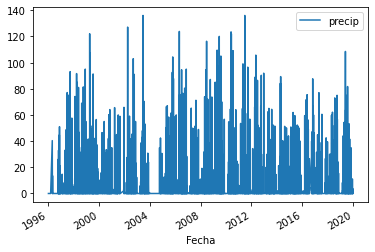

In [199]:
ppt.plot()

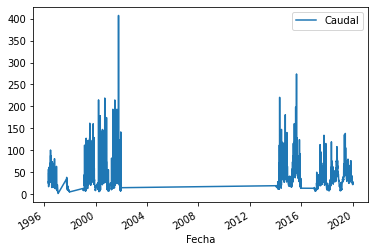

In [200]:
Caudal.plot()

In [201]:
ppt.dtypes


precip    float64
dtype: object

In [202]:
Caudal.dtypes

Caudal    float64
dtype: object

In [203]:
ppt.head() # Para verificar que toda la informacion sea float para poder operar

,precip
Fecha,
1996-01-01,0.0
1996-01-02,0.0
1996-01-03,0.0
1996-01-04,0.0
1996-01-05,0.0


In [204]:
ppt.tail() # Para verificar que toda la informacion sea float para poder operar

,precip
Fecha,
2019-12-27,0.0
2019-12-28,0.0
2019-12-29,3.7
2019-12-30,0.0
2019-12-31,0.0


In [205]:
pp.index

DatetimeIndex(['1996-01-01', '1996-01-02', '1996-01-03', '1996-01-04',
               '1996-01-05', '1996-01-06', '1996-01-07', '1996-01-08',
               '1996-01-09', '1996-01-10',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='Fecha', length=7968, freq=None)

In [206]:
#ppt.dropna(), lo que hace es eliminar los que no sean datos

In [207]:
#pp.index = pd.to_datetime(pp.index) si se quisiera cambiar el index a fecha

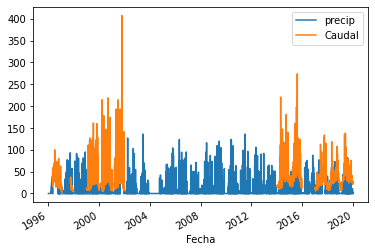

In [208]:
# Con axis= 0 lo une abajo, con axis= 1 lo une como otra columna
merged=pd.concat([ppt,Caudal], axis=1)
merged.index=pd.to_datetime(merged.index)# si se requiere convertir el indice a fecha
merged.plot()

In [209]:
merged.tail()

,precip,Caudal
Fecha,,
2019-12-27,0.0,28.195891
2019-12-28,0.0,26.287937
2019-12-29,3.7,25.488759
2019-12-30,0.0,23.263731
2019-12-31,0.0,21.603213


In [210]:
merged.dtypes

precip    float64
Caudal    float64
dtype: object

In [211]:
merged.index

DatetimeIndex(['1996-01-01', '1996-01-02', '1996-01-03', '1996-01-04',
               '1996-01-05', '1996-01-06', '1996-01-07', '1996-01-08',
               '1996-01-09', '1996-01-10',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='Fecha', length=8336, freq=None)

In [212]:
merged.to_excel('/content/sample_data/merged.xls')

In [213]:
merged['year']=merged.index.year
MeanYear= merged.groupby('year').mean()
MeanYear

,precip,Caudal
year,,
1996,2.362238,37.062140
1997,3.753151,10.206111
1998,4.945753,NaN
1999,4.533151,35.559726
2000,4.480548,36.963284
2001,4.274486,34.957260
2002,4.749451,NaN
2003,3.591484,NaN
2004,2.126829,NaN


In [214]:
MeanYear.corr()

,precip,Caudal
precip,1.00000,0.29068
Caudal,0.29068,1.00000


In [215]:
merged['month']=merged.index.month
MeanMonth= merged.groupby('month').mean()
MeanMonth

,precip,Caudal,year
month,,,
1,0.333468,13.021697,2007.500000
2,1.042395,16.478241,2008.079288
3,1.912993,18.745688,2008.081752
4,6.945522,30.862823,2008.000000
5,8.884751,43.692744,2007.652174
6,8.646870,48.541421,2007.648175
7,8.029261,51.467496,2007.647472
8,6.484401,46.927266,2007.283824
9,6.301933,47.777033,2007.297872


In [216]:
MeanMonth.corr()

,precip,Caudal,year
precip,1.000000,0.902536,-0.256408
Caudal,0.902536,1.000000,-0.526255
year,-0.256408,-0.526255,1.000000


In [217]:
# filtrar los valores unicamente los que tienen datos isnull son los vacios, si le añado ~ que sale con alt 126 es negar los que estan vacios es decir unicamente los que si tienen valores

MeanYear[~MeanYear.Caudal.isnull()]

,precip,Caudal
year,,
1996,2.362238,37.062140
1997,3.753151,10.206111
1999,4.533151,35.559726
2000,4.480548,36.963284
2001,4.274486,34.957260
2014,4.224384,40.587836
2015,4.621644,44.236658
2017,3.543956,25.558590
2018,6.029041,34.282566


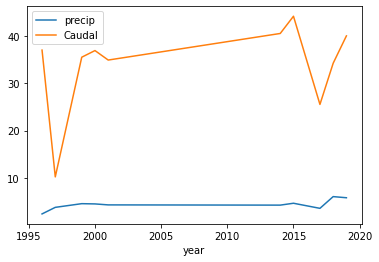

In [218]:
MeanYear[~MeanYear.Caudal.isnull()].plot()